In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
import math
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.figsize'] = (20.0, 10.0)

import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
crime = pd.read_csv('NYC_Offenses_2013.csv')

In [3]:
crime.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,Pop_sq
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,"3,463,321"


In [4]:
# delete rows :3

crime = crime.drop(crime.index[[0, 1, 2, 3]])

In [5]:
# delete last 3 rows

crime = crime.drop(crime.index[[348, 349, 350]])

In [6]:
# view column names

crime.columns

Index(['Table 8', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [7]:
# rename columns

crime = crime.rename(columns={'Table 8' : 'city', 'Unnamed: 1' : 'population', 'Unnamed: 2' : 'violent_crime',
                              'Unnamed: 3' : 'murder', 'Unnamed: 4' : 'rape_revised', 'Unnamed: 5' : 'rape',
                              'Unnamed: 6' :'robbery', 'Unnamed: 7' : 'aggravated_assault',
                              'Unnamed: 8' : 'property_crime','Unnamed: 9' : 'burglary', 'Unnamed: 10' : 'larceny',
                              'Unnamed: 11' : 'vehicle_theft', 'Unnamed: 12' : 'arson', 'Unnamed: 13' : 'pop_sq'})

In [8]:
# drop pop_sq column from dataset

crime = crime.drop('pop_sq', 1)

In [9]:
# remove commas from columns

crime = crime.replace(',','', regex=True)

In [10]:
# verify columns renamed, commas removed & pop_sq column dropped

crime.head()

,city,population,violent_crime,murder,rape_revised,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft,arson
4,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,NaN


In [11]:
# verify last 3 rows dropped from table

crime.tail()

,city,population,violent_crime,murder,rape_revised,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft,arson
347,Woodbury Town,10685,3,0,nan,0,2,1,541,9,529,3,NaN
348,Woodridge Village,829,7,0,nan,0,0,7,17,8,9,0,0
349,Woodstock Town,5931,2,0,nan,0,0,2,58,13,45,0,NaN
350,Yonkers,199134,1036,6,nan,25,390,615,2368,470,1662,236,10
351,Yorktown Town,36643,15,0,nan,0,2,13,334,45,287,2,NaN


In [12]:
crime['population'].describe()

count      348
unique     347
top       9517
freq         2
Name: population, dtype: object

In [13]:
# change population column from object to float

crime['population'] = crime['population'].astype(float)
crime['population'].describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: population, dtype: float64

In [14]:
crime = crime[crime.population < (np.percentile(crime.population, 75))]

In [15]:
crime['population'].describe()

count     261.000
mean     6071.218
std      4471.334
min       526.000
25%      2381.000
50%      4704.000
75%      8544.000
max     18182.000
Name: population, dtype: float64

In [16]:
# change property crime column from object to float

crime['property_crime'] = crime['property_crime'].astype(float)
crime['property_crime'].describe()

count   261.000
mean    119.345
std     140.709
min       0.000
25%      29.000
50%      66.000
75%     156.000
max     949.000
Name: property_crime, dtype: float64

In [17]:
# change robbery column from object to float

crime['robbery'] = crime['robbery'].astype(float)
crime['robbery'].describe()

count   261.000
mean      1.632
std       3.025
min       0.000
25%       0.000
50%       0.000
75%       2.000
max      20.000
Name: robbery, dtype: float64

In [18]:
# change murder column from object to float

crime['murder'] = crime['murder'].astype(float)
crime['murder'].describe()

count   261.000
mean      0.054
std       0.226
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       1.000
Name: murder, dtype: float64

In [19]:
# change violent crime column from object to float

crime['violent_crime'] = crime['violent_crime'].astype(float)
crime['violent_crime'].describe()

count   261.000
mean      8.080
std      12.259
min       0.000
25%       1.000
50%       3.000
75%       9.000
max      89.000
Name: violent_crime, dtype: float64

In [20]:
# change rape_revised def column from object to float

crime['rape_revised'] = crime['rape_revised'].astype(float)
crime['rape_revised'].describe()

count   0.000
mean      nan
std       nan
min       nan
25%       nan
50%       nan
75%       nan
max       nan
Name: rape_revised, dtype: float64

In [21]:
# drop rape_revised column from dataset

crime.drop('rape_revised', axis=1, inplace=True)

In [22]:
# change rape column from object to float

crime['rape'] = crime['rape'].astype(float)
crime['rape'].describe()

count   261.000
mean      0.705
std       1.598
min       0.000
25%       0.000
50%       0.000
75%       1.000
max      13.000
Name: rape, dtype: float64

In [23]:
# change aggravated assault column from object to float

crime['aggravated_assault'] = crime['aggravated_assault'].astype(float)
crime['aggravated_assault'].describe()

count   261.000
mean      5.690
std       8.593
min       0.000
25%       0.000
50%       3.000
75%       7.000
max      64.000
Name: aggravated_assault, dtype: float64

In [24]:
# change burglary column from object to float

crime['burglary'] = crime['burglary'].astype(float)
crime['burglary'].describe()

count   261.000
mean     19.226
std      23.494
min       0.000
25%       4.000
50%      11.000
75%      23.000
max     138.000
Name: burglary, dtype: float64

In [25]:
# change larceny column from object to float

crime['larceny'] = crime['larceny'].astype(float)
crime['larceny'].describe()

count   261.000
mean     97.736
std     118.640
min       0.000
25%      20.000
50%      53.000
75%     121.000
max     828.000
Name: larceny, dtype: float64

In [26]:
# change vehicle theft column from object to float

crime['vehicle_theft'] = crime['vehicle_theft'].astype(float)
crime['vehicle_theft'].describe()

count   261.000
mean      2.383
std       3.822
min       0.000
25%       0.000
50%       1.000
75%       3.000
max      35.000
Name: vehicle_theft, dtype: float64

In [27]:
# change arson column from object to float

crime['arson'] = crime['arson'].astype(float)
crime['arson'].describe()

count   145.000
mean      0.345
std       0.861
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       5.000
Name: arson, dtype: float64

In [28]:
# drop arson column

crime.drop('arson', axis=1, inplace=True)

In [29]:
# verify rape_revised & arson columns dropped from dataset

crime.head()

,city,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000
5,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000
6,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000
8,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000
9,Alfred Village,4089.000,5.000,0.000,0.000,3.000,2.000,46.000,10.000,36.000,0.000


In [30]:
crime.drop_duplicates()

,city,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000
5,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000
6,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000
8,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000
9,Alfred Village,4089.000,5.000,0.000,0.000,3.000,2.000,46.000,10.000,36.000,0.000
10,Allegany Village,1781.000,3.000,0.000,0.000,0.000,3.000,10.000,0.000,10.000,0.000
12,Amityville Village,9519.000,9.000,0.000,2.000,4.000,3.000,210.000,16.000,188.000,6.000
13,Amsterdam,18182.000,30.000,0.000,0.000,12.000,18.000,405.000,99.000,291.000,15.000
14,Arcade Village,2053.000,0.000,0.000,0.000,0.000,0.000,39.000,3.000,35.000,1.000
15,Ardsley Village,4523.000,5.000,0.000,0.000,3.000,2.000,33.000,4.000,28.000,1.000


In [31]:
crime.isnull().sum()

city                  0
population            0
violent_crime         0
murder                0
rape                  0
robbery               0
aggravated_assault    0
property_crime        0
burglary              0
larceny               0
vehicle_theft         0
dtype: int64

In [32]:
crime.dropna()

,city,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft
4,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000
5,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000
6,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000
8,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000
9,Alfred Village,4089.000,5.000,0.000,0.000,3.000,2.000,46.000,10.000,36.000,0.000
10,Allegany Village,1781.000,3.000,0.000,0.000,0.000,3.000,10.000,0.000,10.000,0.000
12,Amityville Village,9519.000,9.000,0.000,2.000,4.000,3.000,210.000,16.000,188.000,6.000
13,Amsterdam,18182.000,30.000,0.000,0.000,12.000,18.000,405.000,99.000,291.000,15.000
14,Arcade Village,2053.000,0.000,0.000,0.000,0.000,0.000,39.000,3.000,35.000,1.000
15,Ardsley Village,4523.000,5.000,0.000,0.000,3.000,2.000,33.000,4.000,28.000,1.000


In [33]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'property_crime ~ burglary+larceny+robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime).fit()

In [34]:
lm.params

Intercept   0.472
burglary    1.050
larceny     1.005
robbery     0.294
dtype: float64

In [35]:
lm.pvalues

Intercept   0.056
burglary    0.000
larceny     0.000
robbery     0.005
dtype: float64

In [36]:
lm.rsquared

0.9995642282549313

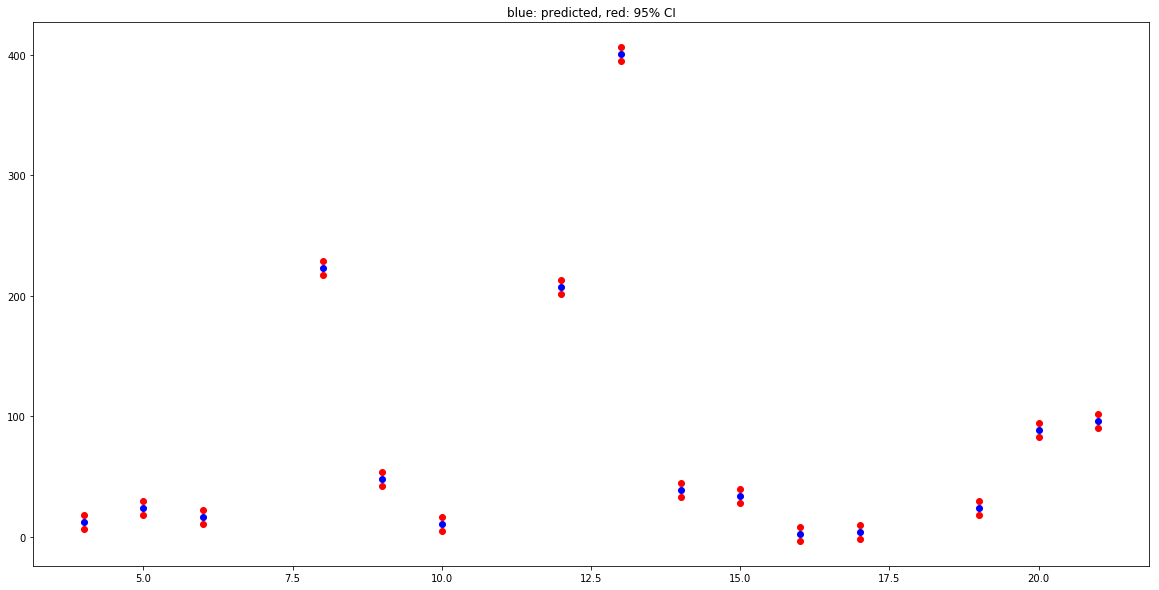

In [37]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [38]:
# Instantiate and fit model

regr = linear_model.LinearRegression()
Y = crime['property_crime'].values.reshape(-1, 1)
X = crime[['robbery','burglary','larceny']]
regr.fit(X, Y)

# Inspect the results

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.29400745  1.04973419  1.00486028]]

Intercept: 
 [ 0.47205298]

R-squared:
0.999564228255


In [39]:
data = crime[['burglary'] + ['larceny'] + ['robbery']]
target = crime['property_crime']

y_pred = regr.fit(data, target).predict(data)

In [40]:
print(data.shape)
f = len(data)
g = round(.20 * f)
h = round(.80 * f)
print(g)
print(h)
training_data = data[:h] 
training_target = target[:h]
testing_data = data[:-g]
testing_target = target[:-g]

y_pred = regr.fit(training_data, training_target).predict(testing_data)

(261, 3)
52
209


In [41]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(data, target).score(data, target)))

With 20% Holdout: 0.999639006881
Testing on Sample: 0.999564228255


In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, data, target, cv=10)

array([ 0.99962112,  0.99960075,  0.99954949,  0.9997276 ,  0.99922556,
        0.99929676,  0.99971423,  0.99965356,  0.99891864,  0.99933899])